In [2]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import wrangle
import utilities

%load_ext autoreload
%autoreload 2

# Questions:
> * 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
> * 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
> * 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
> * 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
> * 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
> * 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
> * 7. Which lessons are least accessed?
> * 8. Anything else I should be aware of?



In [3]:
df = wrangle.wrangle_logs()

# Question 1:

**Key Conclusion:** answer answer answer answer

In [4]:
# Visualization

In [5]:
# any explanation of the visualization you feel is necessary.

# 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?



**Key Conclusion:** The Marco cohort has the most searches of the most accessed javascript lesson. In terms of traffic, top five cohorts make up **26%** of traffic to that lesson, while the bottom five makes up **0.2%** of traffic.

In [79]:
# Showing the top accessed paths that have an endpoint
path_df = utilities.path_counts(df.path)
path_df.head()

,path,count,percent
0,/,50313,0.055889
1,search/search_index.json,19519,0.021682
13,javascript-i/introduction/working-with-data-ty...,7642,0.008489
14,mysql/tables,7356,0.008171
15,javascript-i/javascript-with-html,7350,0.008165


> Most accessed lesson is **'javascript-i/introduction/working-with-data-types-operators-and-variables'**

### Which cohorts inquired the most for the most accessed lesson? The least?

In [119]:
# Isolating the most searched 'javascript-i' extension
intro_path, num_web_dev_cohorts = utilities.intro_path_df(df)

# Which cohorts inquired the most for the most researched lesson?
intro_freq = utilities.value_counts_and_frequencies(intro_path.name, dropna=False)

In [120]:
# Display top 5 and bottom 5 webdev cohorts by traffic on the most accessed lesson
utilities.display_cohort_traffic(intro_freq)

,count,percent
Marco,505,0.066082
Ceres,423,0.055352
Hyperion,382,0.049987
Jupiter,362,0.047370
Zion,356,0.046585
,count,percent
Hampton,9,0.001178
Kings,4,0.000523
Ike,1,0.000131
Quincy,1,0.000131


In [121]:
# Pct of traffic by cohorts
utilities.top_bot_5(intro_freq)

The top 5 cohorts account for 26.5% of traffic to the most popular lesson, while the bottom 5 cohorts      account for 0.2% of traffic.


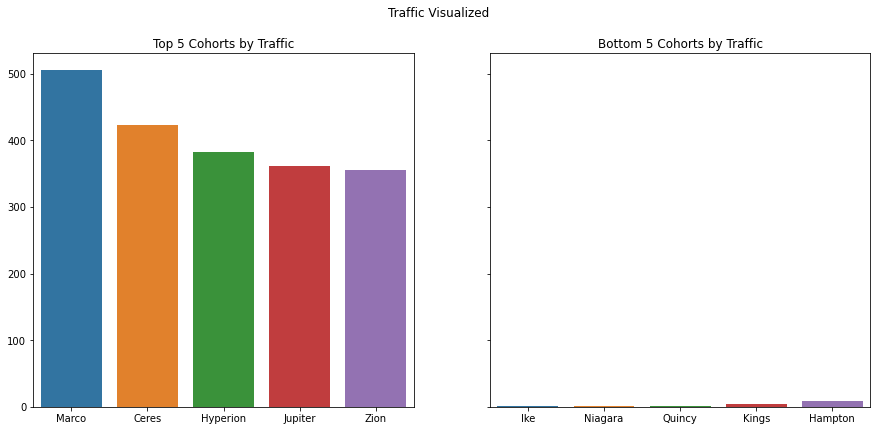

array([<AxesSubplot:title={'center':'Top 5 Cohorts by Traffic'}>,
       <AxesSubplot:title={'center':'Bottom 5 Cohorts by Traffic'}>],
      dtype=object)

In [126]:
# Plotting the tables above 
utilities.plot_top_bot_five(intro_path)

**This stark difference shows the gap between webdev cohorts that accessed the lessons a lot versus the ones that didn't.**

# Question 6: What topics are grads continuing to reference after graduation and into their jobs (for each program)?

**Key Conclusion:** 
For the Web Development program Java lessons account for 21.5%, Javascript lessons account for 20.6%, and Spring lessons account for 13.3% of all content accessed by WebDev grads after graduation. Of note, the top four most accessed lessons were all covering Spring.

For the Data Science program SQL lessons account for 16.2%, Fundamentals lessons account for 15.8%, and Classification lessons account for 13.7% of all content accessed by DS grads after graduation.

In [8]:
df = wrangle.wrangle_logs()

In [9]:
# Dropping staff from the dataframe so as to only evaluate students
cleaned = df[df.name != 'Staff']

# Since the '/' and the 'search/search_index.json' paths are not actual topic locations, I will drop these two paths.
cleaned = cleaned[(cleaned.path != '/') & (cleaned.path != 'search/search_index.json')]

# Removing any access logs that occurred prior the the cohort finishing at Codeup as the question asks about post 
# graduation access.
cleaned = cleaned[cleaned.date > cleaned.end_date]

When comparing program ids to cohort names, according to the https://alumni.codeup.com/ website the id columns corresponds as follows:
- Program ids 1, 2, 4 are all WebDev cohorts
- Program 3 is a Data Scientist cohort

In [10]:
# Splitting the dataframe into Data Science and Web Development students
ds = cleaned[cleaned.program_id == 3]
webdev = cleaned[cleaned.program_id != 3]

#### Now examining just the Web Development graduates' access logs.

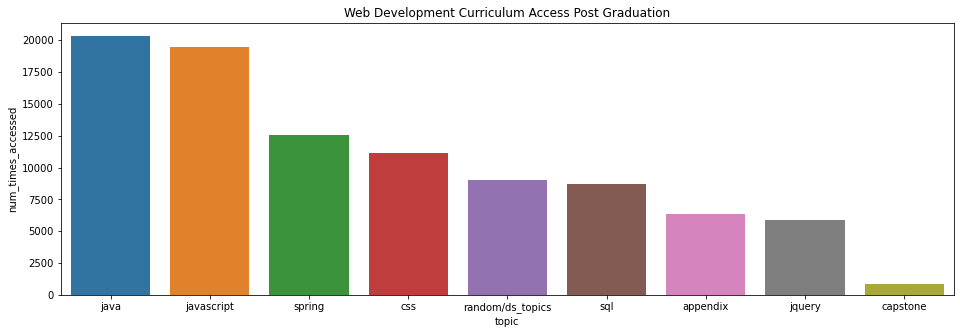

The two largest topics are as follows:
Java accounts for 21.54% 
Javascript accounts for 20.66%


In [11]:
utilities.webdev_visuals(webdev)

#### Now I will show the individual lessons that were most viewed for Web Development students after graduation.

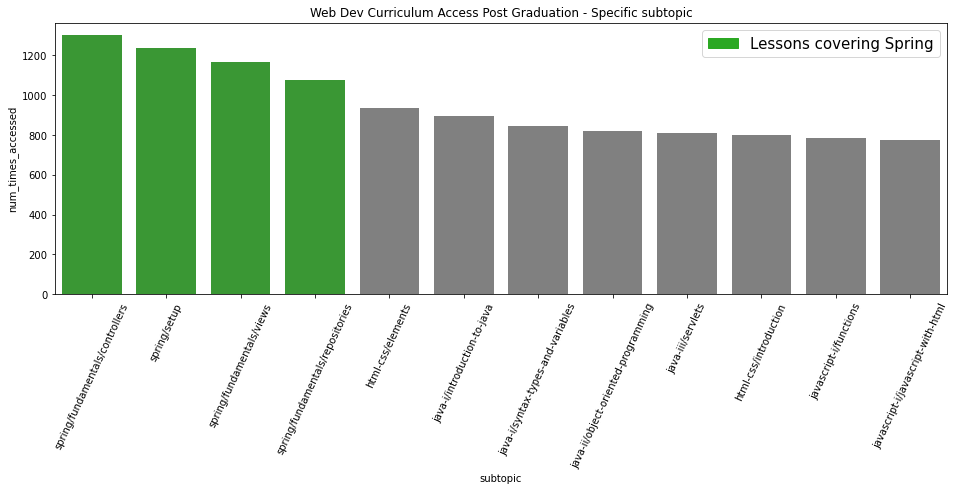

In [12]:
utilities.webdev_subtopics()

#### Lessons covering Spring were the top 4 accessed individual lessons. This is interesting since by topic Spring accounts for significantly less access than Java or Javascript.

#### Now examining just the Data Science graduates' access logs.

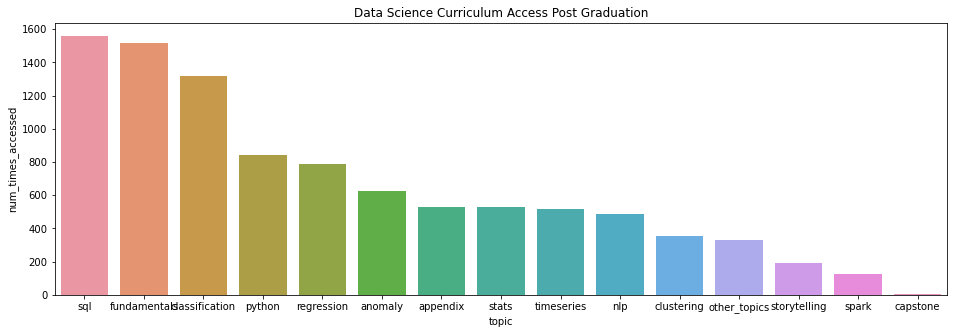

The largest topics are as follows:
SQL accounts for 16.23% 
Fundamentals accounts for 15.83%
Classification accounts for 13.7%


In [13]:
utilities.ds_visuals(ds)

# Question 7: Which Lessons Are Least Accessed?

**Key Takeaway:** 
> * **450** of the **2300** **(~20%)** pages have been accessed only once

I looked at the total number of paths that had only been accessed once.

In [14]:
once = (df.path.value_counts() == 1).sum()
print(f'{once} pages have been accessed once, which is about {round(once/df.path.unique().size * 100)}%'\
      ' of total unique paths.')

458 pages have been accessed once, which is about 20% of total unique paths.


Since this is such a large portion of unique paths, I decided to put these paths into 28 different categories to get a better picture of which topics had the most number of pages only viewed once.

In [19]:
# Create series of pages only viewed once, then separated and sorted
least_accessed = utilities.accessed_once_series(df)
results = utilities.least_accessed_by_category(least_accessed)
results.head()

,topic,num_times_accessed
28,other_topics,235
7,appendix,45
15,css,29
13,javascript,28
2,stats,19


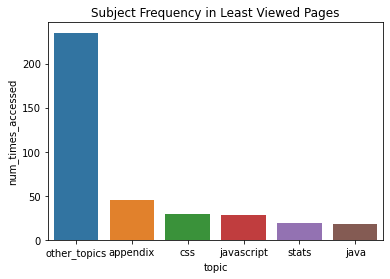

In [23]:
# visualize top categories for lessons visited once
utilities.create_least_viewed_viz(results)

**Other Takeaways:**
* 'Other topics' and 'appendix' are **60%** of all topics for paths that have only been viewed once.
* All other categories (**26** categories out of **28** total) create the other **~40%**
* **20%** of paths accessed once have file extensions for their endpoint (.jpg, .zip, .csv, etc.)
* Because such a large portion of paths have only been accessed once, it's difficult to state a clear distinction by category or lesson.

# Question 8: Anything else I should be aware of?

We noticed there is portion of access logs containing users who do not have a cohort. Upon exploration we noticed the access patterns of these users with no cohort looks quite similar to the access patterns of a normal cohort. See below:

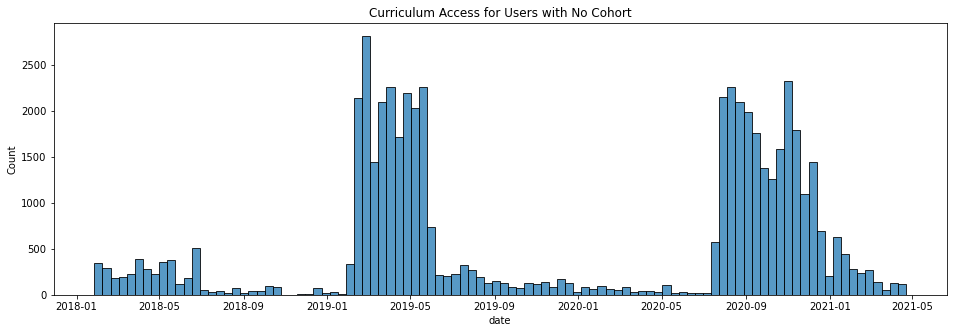

In [124]:
utilities.no_cohorts()

The spikes in null values represents two main groups: one from roughly Feb 2019 to Aug 2019 and another from roughly July 2020 to Dec 2020. I will visualize an example cohort to show how the pattern compares for a normal cohort.

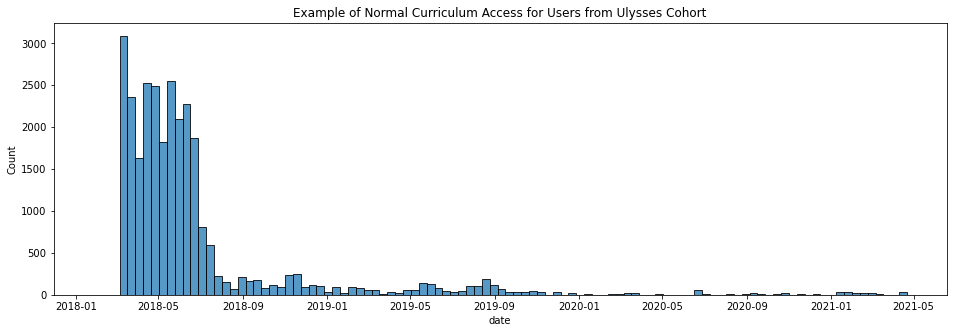

In [125]:
utilities.sample_cohort()

They look roughly similar. Thus we can make a guess about what these null values for cohorts represent:
- The two main groups possibly represent two separate cohorts that for some reason were not encoded with cohort information.